---
title: 'IMDB Data Cleaning'
subtitle: 'DSAN 5200: Data Visualization - Final Project'
author: Billy McGloin
date: last-modified
date-format: long
format:
  html:
    self-contained: true
    toc: true
    code-overflow: wrap
    code-fold: true
---

# Initial Look at Raw Data

In [70]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# load the data
title_akas = pd.read_csv('../data/raw_data/title.akas.tsv', sep='\t')
title_basics = pd.read_csv('../data/raw_data/title.basics.tsv', sep='\t', low_memory = False)
title_crew = pd.read_csv('../data/raw_data/title.crew.tsv', sep='\t')
title_episode = pd.read_csv('../data/raw_data/title.episode.tsv', sep='\t')
title_principals = pd.read_csv('../data/raw_data/title.principals.tsv', sep='\t')
title_ratings = pd.read_csv('../data/raw_data/title.ratings.tsv', sep='\t')
name_basics = pd.read_csv('../data/raw_data/name.basics.tsv', sep='\t')

## Title Akas

In [72]:
title_akas.head(20)
# does not appear to be particularly useful - maybe needed for title & titleid mapping
# i thought maybe region but region is just "the region for this version of the title", not where it was made

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,\N,\N,original,\N,1
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita,US,\N,imdbDisplay,\N,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
4,tt0000001,5,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
5,tt0000001,6,Карменсита,RU,\N,imdbDisplay,\N,0
6,tt0000001,7,Карменсіта,UA,\N,imdbDisplay,\N,0
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,\N,0
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
9,tt0000002,2,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0


## Title Basics

In [73]:
title_basics.head(20)
# basic inforamtion about titles - 10.68 million rows

# tconst = unique identifier for the title
# titleType = type of title (movie, short, tvseries, tvepisode, videogame, etc.)
# primaryTitle = more popular title / title used by the filmmakers on promotional materials at the point of release
# originalTitle = title in original language
# isAdult = 0: non-adult title; 1: adult title
# startYear = represents the release year of a title. In the case of TV Series, it is the series start year
# endYear = TV Series end year, \N for all other title types
# runtimeMinutes = primary runtime of the title in minutes
# genres = includes up to three genres associated with the title

# i want to do value counts for title type, check for duplicates of tconst, check for missing values, etc.

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [74]:
# value counts for titleType in title_basics
title_basics['titleType'].value_counts()

titleType
tvEpisode       8172545
short            988240
movie            676855
video            290503
tvSeries         260537
tvMovie          144988
tvMiniSeries      53586
tvSpecial         46990
videoGame         37931
tvShort           10285
tvPilot               1
Name: count, dtype: int64

In [75]:
# check for duplicates of tconst
title_basics['tconst'].duplicated().sum()

0

In [76]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682461 entries, 0 to 10682460
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 733.5+ MB


## Title Crew

In [77]:
title_crew.head(20)
# Lists the directors and writers associated with movies, TV shows, and episodes - 10.05 million rows

# tconst = unique identifier for the title
# directors = director(s) of the given title (identified by their nconst)
# writers = writer(s) of the given title (identified by their nconst) if any

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
5,tt0000006,nm0005690,\N
6,tt0000007,"nm0005690,nm0374658",\N
7,tt0000008,nm0005690,\N
8,tt0000009,nm0085156,nm0085156
9,tt0000010,nm0525910,\N


In [78]:
# max number of directors for a title
title_crew['directors'].str.split(',').apply(lambda x: len(x)).max()

509

In [79]:
# 509 directors doesnt make sense - check for the title with 509 directors
title_crew[title_crew['directors'].str.split(',').apply(lambda x: len(x)) == 509]

,tconst,directors,writers
427578,tt0441074,"nm0417370,nm0361540,nm3874442,nm0344761,nm1337...","nm2556881,nm0417370,nm0051304,nm0610720,nm0293..."


In [80]:
# find the tconst value within title_basics to get title name (more information)
title_basics[title_basics['tconst'] == 'tt0441074']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
423247,tt0441074,tvSeries,Television Theater,Teatr Telewizji,0,1953,\N,\N,Drama


In [81]:
# no idea what this is - also has only 89 reviews - we're probabily going to remove this later

# check for max number of writers for a title
title_crew['writers'].str.split(',').apply(lambda x: len(x)).max()

1357

## Title Episode

In [82]:
title_episode.head(20)
# Details about TV show episodes, including the season number, episode number, and the parent TV show's ID - 8.17 million rows

# tconst = unique identifier for the episode
# parentTconst = unique identifier for the parent TV show
# seasonNumber = season number the episode belongs to
# episodeNumber = episode number of the tconst in the TV show

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
5,tt0043693,tt0989125,2,8
6,tt0043710,tt0989125,3,3
7,tt0044093,tt0959862,1,6
8,tt0044668,tt0044243,2,16
9,tt0044901,tt0989125,3,46


In [83]:
# the highest count of a single value in parentTconst
title_episode['parentTconst'].value_counts().max()

18593

## Title Principals

In [84]:
title_principals.head(20)
# Provides information on the main cast/crew for titles, including their roles (actor, actress, director, etc.) - 85 million rows

# tconst = unique identifier for the title
# nconst = unique identifier for the name/person
# category = the category of job that person was in
# job = the specific job title if applicable, else '\N'
# characters = the name of the character played if applicable, else '\N'

# i want to do value counts for category, check for the highest number of duplicates for tconst, and check for missing values

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N
5,tt0000002,2,nm1335271,composer,\N,\N
6,tt0000003,1,nm0721526,director,\N,\N
7,tt0000003,2,nm1770680,producer,producer,\N
8,tt0000003,3,nm0721526,producer,producer,\N
9,tt0000003,4,nm1335271,composer,\N,\N


In [85]:
# value counts for category in title_principals
title_principals['category'].value_counts()

category
actor                  20368078
actress                15231487
self                   11956965
writer                 10340045
director                7380077
producer                6467648
editor                  4500416
cinematographer         3447520
composer                2808980
production_designer     1044429
casting_director         995731
archive_footage          495878
archive_sound              7257
Name: count, dtype: int64

In [86]:
# the title and count for the tconst that appears the most
title_principals['tconst'].value_counts().idxmax(), title_principals['tconst'].value_counts().max()

('tt0398022', 75)

## Title Ratings

In [87]:
title_ratings.head(20)
# Contains the IMDb rating and number of votes for titles - 1.42 million rows

# tconst = unique identifier for the title
# averageRating = weighted average of all the individual user ratings
# numVotes = number of votes the title has received - number of ratings? this can be used to filter out titles with low number of votes

# i want to look at the distribution of averageRating and numVotes, i also want to see if there are duplicates of tconst (does it have reviews for every episode of a tv show or just the show itself?)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2041
1,tt0000002,5.7,273
2,tt0000003,6.5,1997
3,tt0000004,5.4,178
4,tt0000005,6.2,2757
5,tt0000006,5.0,183
6,tt0000007,5.4,854
7,tt0000008,5.4,2185
8,tt0000009,5.3,210
9,tt0000010,6.8,7530


<Axes: >

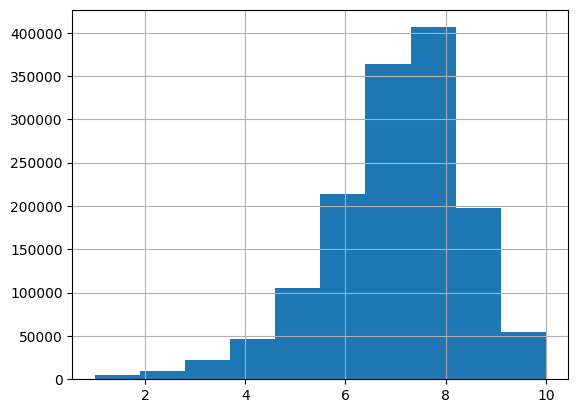

In [88]:
# distribution of averageRating
title_ratings['averageRating'].hist()

<Axes: >

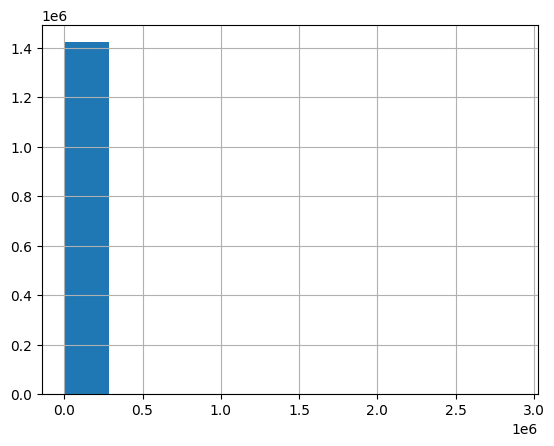

In [89]:
# distribution of numVotes
title_ratings['numVotes'].hist()

<Axes: >

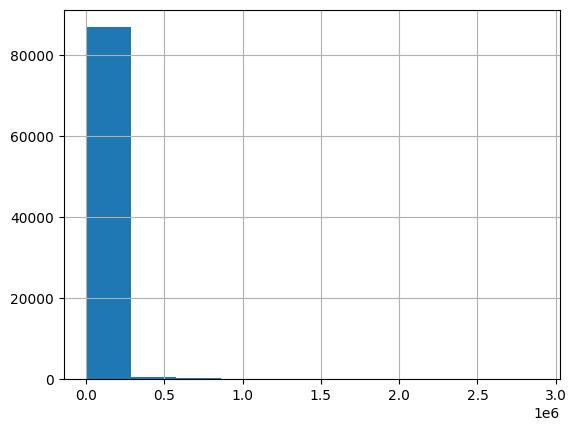

In [90]:
# distributoin of numVotes for numVotes > 10000
title_ratings[title_ratings['numVotes'] > 1000]['numVotes'].hist()

<Axes: >

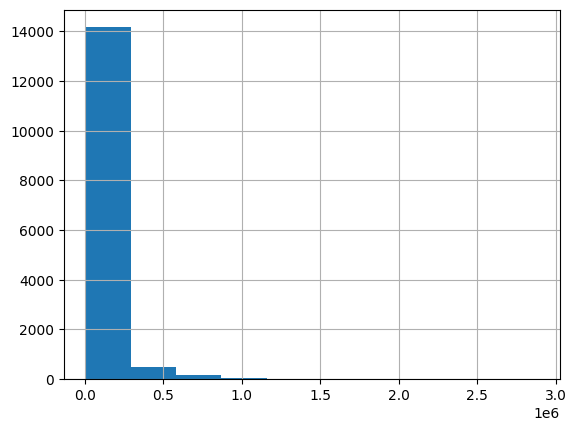

In [91]:
# distributoin of numVotes for numVotes > 100000
title_ratings[title_ratings['numVotes'] > 10000]['numVotes'].hist()

<Axes: >

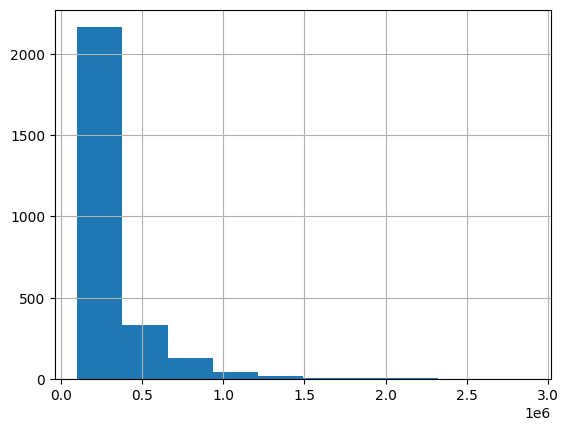

In [92]:
# distributoin of numVotes for numVotes > 100000
title_ratings[title_ratings['numVotes'] > 100000]['numVotes'].hist()

In [93]:
# get summary statistics for numVotes
title_ratings['numVotes'].describe()

count    1.423814e+06
mean     1.034377e+03
std      1.767918e+04
min      5.000000e+00
25%      1.100000e+01
50%      2.600000e+01
75%      1.010000e+02
max      2.880568e+06
Name: numVotes, dtype: float64

In [94]:
# are there duplicates of tconst?
title_ratings['tconst'].duplicated().sum()

0

## Name Basics

In [95]:
name_basics.head(20)
# Offers basic information about people (actors, directors, writers, etc.), including their known for titles and primary profession - 13.4 million rows

# nconst = unique identifier for the name/person
# primaryName = name by which the person is most often credited
# birthYear = in YYYY format
# deathYear = in YYYY format if applicable, else '\N'
# primaryProfession = the top-3 professions of the person (not all)
# knownForTitles = titles the person is known for

# i want to split primary profession and get value counts, i also want to be able to merge the titles they are know for with titles to get more information

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,producer,soundtrack","tt0034583,tt0036855,tt0038109,tt0038787"
6,nm0000007,Humphrey Bogart,1899,1957,"actor,producer,miscellaneous","tt0034583,tt0042593,tt0043265,tt0037382"
7,nm0000008,Marlon Brando,1924,2004,"actor,director,writer","tt0078788,tt0068646,tt0047296,tt0070849"
8,nm0000009,Richard Burton,1925,1984,"actor,producer,director","tt0061184,tt0087803,tt0059749,tt0057877"
9,nm0000010,James Cagney,1899,1986,"actor,director,producer","tt0029870,tt0031867,tt0042041,tt0035575"


In [96]:
# split primary profession at commas
name_basics['primaryProfession'] = name_basics['primaryProfession'].str.split(',')
name_basics['primaryProfession'].explode().value_counts()

primaryProfession
actor                        3111984
\N                           2567402
actress                      1881928
miscellaneous                1397934
producer                     1194085
writer                        894470
camera_department             794178
director                      730632
art_department                476285
sound_department              390163
cinematographer               386266
editor                        357634
composer                      338045
music_department              276106
assistant_director            259683
visual_effects                240841
make_up_department            227332
animation_department          218574
production_manager            210038
archive_footage               190095
editorial_department          190002
costume_department            157955
soundtrack                    149245
transportation_department     102747
art_director                   93766
stunts                         89726
script_department   

In [97]:
# maximum number of knownForTitles - okay so we cant gauge popularity by known titles unless we combine with something else such as numVotes
name_basics['knownForTitles'].str.split(',').str.len().max()

4

# Data Cleaning/Merging

## Filtering Data Based on the Number of Reviews

In [98]:
# so there are 1.42 million titles that have ratings, the mean is 1,034 ratings, the standard deviation is 17,679 ratings
# 25th percentile: 11 ratings, 50th percentile: 26 ratings, 75th percentile: 101 ratings, max: 2.88 million ratings
# based on the above information, let's say that we only want to consider titles with at least 1000 ratings

# filter out titles with less than 1000 ratings
filtered_title_ratings = title_ratings[title_ratings['numVotes'] > 1000]

# how many titles are left?
filtered_title_ratings.shape

(87641, 3)

In [99]:
# 87,641 movies/tv shows/etc
filtered_title_ratings.head(20)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2041
2,tt0000003,6.5,1997
4,tt0000005,6.2,2757
7,tt0000008,5.4,2185
9,tt0000010,6.8,7530
11,tt0000012,7.4,12828
12,tt0000013,5.7,1953
13,tt0000014,7.1,5820
14,tt0000015,6.1,1162
15,tt0000016,5.9,1571


## Merging with Title Basics

In [100]:
# merge title_basics and filtered_title_ratings (only keeping rows that are in both dataframes)
title_basics_filtered = title_basics.merge(filtered_title_ratings, on = 'tconst')

title_basics_filtered.info() # one potential problem - episodes of a popular tv show with less than 1000 ratings will be removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87641 entries, 0 to 87640
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          87641 non-null  object 
 1   titleType       87641 non-null  object 
 2   primaryTitle    87641 non-null  object 
 3   originalTitle   87641 non-null  object 
 4   isAdult         87641 non-null  object 
 5   startYear       87641 non-null  object 
 6   endYear         87641 non-null  object 
 7   runtimeMinutes  87641 non-null  object 
 8   genres          87641 non-null  object 
 9   averageRating   87641 non-null  float64
 10  numVotes        87641 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 7.4+ MB


In [101]:
# value counts of titleType in title_basics_filtered
title_basics_filtered['titleType'].value_counts() # does ratings of tv episodes decline over time generally? 

titleType
movie           42512
tvEpisode       27510
tvSeries         8483
tvMovie          2714
tvMiniSeries     1821
short            1620
video            1396
videoGame        1037
tvSpecial         473
tvShort            75
Name: count, dtype: int64

In [102]:
# 42,512 movies
# 27,510 tv episodes for 8,483 tv series
# 2,714 tv movies
# 1,037 video games

title_basics_filtered.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2041
1,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1997
2,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2757
3,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short",5.4,2185
4,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short",6.8,7530
5,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0,1896,\N,1,"Documentary,Short",7.4,12828
6,tt0000013,short,The Photographical Congress Arrives in Lyon,Le débarquement du congrès de photographie à Lyon,0,1895,\N,1,"Documentary,Short",5.7,1953
7,tt0000014,short,The Waterer Watered,L'arroseur arrosé,0,1895,\N,1,"Comedy,Short",7.1,5820
8,tt0000015,short,Autour d'une cabine,Autour d'une cabine,0,1894,\N,2,"Animation,Short",6.1,1162
9,tt0000016,short,Boat Leaving the Port,Barque sortant du port,0,1895,\N,1,"Documentary,Short",5.9,1571


In [103]:
# sort by numVotes
title_basics_filtered.sort_values(by = 'numVotes', ascending = False, inplace = True)

title_basics_filtered.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
14300,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568
25661,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2863134
44989,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2543775
16652,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350
33628,tt0944947,tvSeries,Game of Thrones,Game of Thrones,0,2011,2019,60,"Action,Adventure,Drama",9.2,2276108
14073,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance",8.8,2250065
14255,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,2213165
33242,tt0903747,tvSeries,Breaking Bad,Breaking Bad,0,2008,2013,45,"Crime,Drama,Thriller",9.5,2126399
32083,tt0816692,movie,Interstellar,Interstellar,0,2014,\N,169,"Adventure,Drama,Sci-Fi",8.7,2089930
16549,tt0133093,movie,The Matrix,The Matrix,0,1999,\N,136,"Action,Sci-Fi",8.7,2047015


## Directors/Writers

In [104]:
# to make my life easier, now that its sorted, i only want to keep tconst and titleType so i can work with other data easily
temp_df = title_basics_filtered[['tconst', 'titleType']]

In [105]:
# briefly look at the shape of title crew
title_crew.shape

(10045582, 3)

In [106]:
# merge temp_df with title_crew (only keeping rows that are in both dataframes)
title_crew_filtered = title_crew.merge(temp_df, on = 'tconst')

title_crew_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87633 entries, 0 to 87632
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tconst     87633 non-null  object
 1   directors  87633 non-null  object
 2   writers    87633 non-null  object
 3   titleType  87633 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [107]:
# 10 mil rows to 87,000
title_crew_filtered.head(20)

,tconst,directors,writers,titleType
0,tt0000001,nm0005690,\N,short
1,tt0000003,nm0721526,\N,short
2,tt0000005,nm0005690,\N,short
3,tt0000008,nm0005690,\N,short
4,tt0000010,nm0525910,\N,short
5,tt0000012,"nm0525908,nm0525910",\N,short
6,tt0000013,nm0525910,\N,short
7,tt0000014,nm0525910,\N,short
8,tt0000015,nm0721526,\N,short
9,tt0000016,nm0525910,\N,short


In [108]:
# now lets recheck the max amount of directors
title_crew_filtered['directors'].str.split(',').apply(lambda x: len(x)).max()

394

In [109]:
# now let's recheck the max amount of writers
title_crew_filtered['writers'].str.split(',').apply(lambda x: len(x)).max()

649

In [110]:
# lets only filter to get movies 
title_crew_filtered_movies = title_crew_filtered[title_crew_filtered['titleType'] == 'movie']

# re-check the max amount of directors
title_crew_filtered_movies['directors'].str.split(',').apply(lambda x: len(x)).max()

41

In [111]:
# value counts for the number of directors per movie
title_crew_filtered_movies['directors'].str.split(',').apply(lambda x: len(x)).value_counts()

directors
1     39034
2      2870
3       350
4        88
5        59
6        31
8        18
7        18
9         9
11        7
10        7
12        7
13        4
18        2
41        1
15        1
21        1
36        1
35        1
27        1
31        1
Name: count, dtype: int64

In [112]:
# okay, this is not super helpful, lets take another look at the merged data
title_crew_filtered.head(20)

,tconst,directors,writers,titleType
0,tt0000001,nm0005690,\N,short
1,tt0000003,nm0721526,\N,short
2,tt0000005,nm0005690,\N,short
3,tt0000008,nm0005690,\N,short
4,tt0000010,nm0525910,\N,short
5,tt0000012,"nm0525908,nm0525910",\N,short
6,tt0000013,nm0525910,\N,short
7,tt0000014,nm0525910,\N,short
8,tt0000015,nm0721526,\N,short
9,tt0000016,nm0525910,\N,short


In [113]:
# i dont care about who the director is, i just want to know how many directors there are
title_crew_filtered['numDirectors'] = title_crew_filtered['directors'].str.split(',').apply(lambda x: len(x))

# same for writers
title_crew_filtered['numWriters'] = title_crew_filtered['writers'].str.split(',').apply(lambda x: len(x))

# lets take a look at the data again
title_crew_filtered.head(20)

,tconst,directors,writers,titleType,numDirectors,numWriters
0,tt0000001,nm0005690,\N,short,1,1
1,tt0000003,nm0721526,\N,short,1,1
2,tt0000005,nm0005690,\N,short,1,1
3,tt0000008,nm0005690,\N,short,1,1
4,tt0000010,nm0525910,\N,short,1,1
5,tt0000012,"nm0525908,nm0525910",\N,short,2,1
6,tt0000013,nm0525910,\N,short,1,1
7,tt0000014,nm0525910,\N,short,1,1
8,tt0000015,nm0721526,\N,short,1,1
9,tt0000016,nm0525910,\N,short,1,1


In [114]:
# let's remove the directors and writers columns
title_crew_filtered.drop(columns = ['directors', 'writers'], inplace = True)

# lets take a look at the data again
title_crew_filtered.head(20)

,tconst,titleType,numDirectors,numWriters
0,tt0000001,short,1,1
1,tt0000003,short,1,1
2,tt0000005,short,1,1
3,tt0000008,short,1,1
4,tt0000010,short,1,1
5,tt0000012,short,2,1
6,tt0000013,short,1,1
7,tt0000014,short,1,1
8,tt0000015,short,1,1
9,tt0000016,short,1,1


In [115]:
# now merge this data with title_basics_filtered to get more information
merged_df = title_basics_filtered.merge(title_crew_filtered, on = 'tconst')

merged_df.head(25)

,tconst,titleType_x,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleType_y,numDirectors,numWriters
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568,movie,1,2
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2863134,movie,1,4
2,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2543775,movie,1,1
3,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350,movie,1,2
4,tt0944947,tvSeries,Game of Thrones,Game of Thrones,0,2011,2019,60,"Action,Adventure,Drama",9.2,2276108,tvSeries,20,9
5,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance",8.8,2250065,movie,1,2
6,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,2213165,movie,1,2
7,tt0903747,tvSeries,Breaking Bad,Breaking Bad,0,2008,2013,45,"Crime,Drama,Thriller",9.5,2126399,tvSeries,25,10
8,tt0816692,movie,Interstellar,Interstellar,0,2014,\N,169,"Adventure,Drama,Sci-Fi",8.7,2089930,movie,1,2
9,tt0133093,movie,The Matrix,The Matrix,0,1999,\N,136,"Action,Sci-Fi",8.7,2047015,movie,2,2


In [116]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# i want to look at titles that have numDirectors > 10 and an index <= 1000
merged_df[(merged_df['numDirectors'] > 10) & (merged_df.index <= 1000)]

,tconst,titleType_x,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleType_y,numDirectors,numWriters
4,tt0944947,tvSeries,Game of Thrones,Game of Thrones,0,2011,2019,60,"Action,Adventure,Drama",9.2,2276108,tvSeries,20,9
7,tt0903747,tvSeries,Breaking Bad,Breaking Bad,0,2008,2013,45,"Crime,Drama,Thriller",9.5,2126399,tvSeries,25,10
62,tt0108778,tvSeries,Friends,Friends,0,1994,2004,22,"Comedy,Romance",8.9,1085038,tvSeries,28,51
64,tt1520211,tvSeries,The Walking Dead,The Walking Dead,0,2010,2022,45,"Drama,Horror,Thriller",8.1,1078760,tvSeries,54,33
106,tt0898266,tvSeries,The Big Bang Theory,The Big Bang Theory,0,2007,2019,22,"Comedy,Romance",8.1,865474,tvSeries,11,33
147,tt0773262,tvSeries,Dexter,Dexter,0,2006,2013,60,"Crime,Drama,Mystery",8.6,762558,tvSeries,22,21
181,tt0386676,tvSeries,The Office,The Office,0,2005,2013,22,Comedy,9.0,707574,tvSeries,55,40
217,tt2356777,tvSeries,True Detective,True Detective,0,2014,\N,60,"Crime,Drama,Mystery",8.9,653848,tvSeries,11,10
222,tt1190634,tvSeries,The Boys,The Boys,0,2019,\N,60,"Action,Comedy,Crime",8.7,644931,tvSeries,17,17
223,tt3032476,tvSeries,Better Call Saul,Better Call Saul,0,2015,2022,45,"Crime,Drama",9.0,643804,tvSeries,25,11


In [117]:
# i want to look at titles that have numDirectors > 100
merged_df[(merged_df['numDirectors'] > 100)] # some notable titles: saturday night live, 30 for 30

,tconst,titleType_x,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,titleType_y,numDirectors,numWriters
4631,tt0072562,tvSeries,Saturday Night Live,Saturday Night Live,0,1975,\N,90,"Comedy,Music",8.0,52569,tvSeries,122,427
15813,tt0088512,tvSeries,EastEnders,EastEnders,0,1985,\N,30,"Crime,Drama,Romance",4.7,9201,tvSeries,269,446
20780,tt0088580,tvSeries,Neighbours,Neighbours,0,1985,\N,22,"Drama,Romance",5.6,6342,tvSeries,108,279
21718,tt0053494,tvSeries,Coronation Street,Coronation Street,0,1960,\N,30,"Drama,Romance",5.6,6004,tvSeries,244,175
23144,tt1408430,tvSeries,30 for 30,30 for 30,0,2009,\N,60,"Biography,Documentary,History",8.8,5534,tvSeries,106,34
27628,tt0112004,tvSeries,Hollyoaks,Hollyoaks,0,1995,\N,30,"Drama,Romance",4.6,4483,tvSeries,213,217
29925,tt0084987,tvSeries,The Bill,The Bill,0,1984,2010,\N,"Crime,Drama",6.7,4081,tvSeries,260,321
32636,tt0096555,tvSeries,Casualty,Casualty,0,1986,\N,50,Drama,6.1,3681,tvSeries,255,330
34011,tt0068069,tvSeries,Emmerdale Farm,Emmerdale Farm,0,1972,\N,30,"Adventure,Crime,Drama",4.8,3517,tvSeries,227,245
38054,tt0206501,tvSeries,Nova,Nova,0,1974,\N,60,Documentary,8.7,3079,tvSeries,368,290


In [118]:
# i dont think that we can filter out titles based on the number of directors or writers, but based on the above, we might be able to increase the threshold for number of ratings - let's do that now
# only keep titles with over 2,500 ratings
merged_df = merged_df[merged_df['numVotes'] > 2500]

# also remove the column title_Type_y
merged_df.drop(columns = 'titleType_y', inplace = True)

# rename title_Type_x to titleType
merged_df.rename(columns = {'titleType_x': 'titleType'}, inplace = True)

# lets take a look at the data again
merged_df.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568,1,2
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2863134,1,4
2,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2543775,1,1
3,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350,1,2
4,tt0944947,tvSeries,Game of Thrones,Game of Thrones,0,2011,2019,60,"Action,Adventure,Drama",9.2,2276108,20,9
5,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance",8.8,2250065,1,2
6,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,2213165,1,2
7,tt0903747,tvSeries,Breaking Bad,Breaking Bad,0,2008,2013,45,"Crime,Drama,Thriller",9.5,2126399,25,10
8,tt0816692,movie,Interstellar,Interstellar,0,2014,\N,169,"Adventure,Drama,Sci-Fi",8.7,2089930,1,2
9,tt0133093,movie,The Matrix,The Matrix,0,1999,\N,136,"Action,Sci-Fi",8.7,2047015,2,2


In [119]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44870 entries, 0 to 44869
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          44870 non-null  object 
 1   titleType       44870 non-null  object 
 2   primaryTitle    44870 non-null  object 
 3   originalTitle   44870 non-null  object 
 4   isAdult         44870 non-null  object 
 5   startYear       44870 non-null  object 
 6   endYear         44870 non-null  object 
 7   runtimeMinutes  44870 non-null  object 
 8   genres          44870 non-null  object 
 9   averageRating   44870 non-null  float64
 10  numVotes        44870 non-null  int64  
 11  numDirectors    44870 non-null  int64  
 12  numWriters      44870 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 4.8+ MB


In [120]:
# once again, let's look at value counts of titleType and how this new threshold has affected the data - we are now at 44,870
merged_df['titleType'].value_counts()

titleType
movie           25233
tvEpisode       10876
tvSeries         5064
tvMiniSeries     1002
tvMovie           865
video             704
short             473
videoGame         446
tvSpecial         183
tvShort            24
Name: count, dtype: int64

In [121]:
# Reset the option to default
pd.reset_option('display.max_rows')

## Cast and Crew (principals)

In [122]:
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85044511 entries, 0 to 85044510
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 3.8+ GB


In [123]:
# recreate temp_df bc we increased our threshold for numVotes
temp_df = merged_df[['tconst', 'titleType', 'numVotes', 'averageRating']]

# merge temp_df with title_principals (only keeping rows that are in both dataframes)
title_principals_filtered = title_principals.merge(temp_df, on = 'tconst')

title_principals_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896462 entries, 0 to 896461
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         896462 non-null  object 
 1   ordering       896462 non-null  int64  
 2   nconst         896462 non-null  object 
 3   category       896462 non-null  object 
 4   job            896462 non-null  object 
 5   characters     896462 non-null  object 
 6   titleType      896462 non-null  object 
 7   numVotes       896462 non-null  int64  
 8   averageRating  896462 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 61.6+ MB


In [124]:
## 44,870 titles give us 896,462 rows of cast and crew information
title_principals_filtered.head(20)

,tconst,ordering,nconst,category,job,characters,titleType,numVotes,averageRating
0,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]",short,2757,6.2
1,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]",short,2757,6.2
2,tt0000005,3,nm0249379,producer,producer,\N,short,2757,6.2
3,tt0000010,1,nm0525910,director,\N,\N,short,7530,6.8
4,tt0000010,2,nm0525910,producer,producer,\N,short,7530,6.8
5,tt0000010,3,nm0525910,cinematographer,\N,\N,short,7530,6.8
6,tt0000012,1,nm2880396,self,\N,"[""Self""]",short,12828,7.4
7,tt0000012,2,nm9735580,self,\N,"[""Self""]",short,12828,7.4
8,tt0000012,3,nm0525900,self,\N,"[""Self""]",short,12828,7.4
9,tt0000012,4,nm9735581,self,\N,"[""Self""]",short,12828,7.4


In [125]:
# i want to keep all data in title_principals_filtered, merging with name_basics on nconst to get names and more information
title_principals_filtered = title_principals_filtered.merge(name_basics, on = 'nconst')

title_principals_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896460 entries, 0 to 896459
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             896460 non-null  object 
 1   ordering           896460 non-null  int64  
 2   nconst             896460 non-null  object 
 3   category           896460 non-null  object 
 4   job                896460 non-null  object 
 5   characters         896460 non-null  object 
 6   titleType          896460 non-null  object 
 7   numVotes           896460 non-null  int64  
 8   averageRating      896460 non-null  float64
 9   primaryName        896460 non-null  object 
 10  birthYear          896460 non-null  object 
 11  deathYear          896460 non-null  object 
 12  primaryProfession  896460 non-null  object 
 13  knownForTitles     896460 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 95.8+ MB


In [126]:
# 2 rows were removed of the initial 896,462 (im guessing that we had no information on the names)
title_principals_filtered.head(20)

,tconst,ordering,nconst,category,job,characters,titleType,numVotes,averageRating,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]",short,2757,6.2,Charles Kayser,1878,1966,[actor],\N
1,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]",short,2757,6.2,John Ott,1850,1931,[actor],\N
2,tt0000005,3,nm0249379,producer,producer,\N,short,2757,6.2,Thomas A. Edison,1847,1931,"[producer, director, miscellaneous]","tt0361066,tt0242312,tt0004457,tt0001223"
3,tt0001223,7,nm0249379,producer,producer,\N,short,4716,6.4,Thomas A. Edison,1847,1931,"[producer, director, miscellaneous]","tt0361066,tt0242312,tt0004457,tt0001223"
4,tt0000010,1,nm0525910,director,\N,\N,short,7530,6.8,Louis Lumière,1864,1948,"[producer, director, cinematographer]","tt6231346,tt1167665,tt0000014,tt2461054"
5,tt0000010,2,nm0525910,producer,producer,\N,short,7530,6.8,Louis Lumière,1864,1948,"[producer, director, cinematographer]","tt6231346,tt1167665,tt0000014,tt2461054"
6,tt0000010,3,nm0525910,cinematographer,\N,\N,short,7530,6.8,Louis Lumière,1864,1948,"[producer, director, cinematographer]","tt6231346,tt1167665,tt0000014,tt2461054"
7,tt0000012,8,nm0525910,director,\N,\N,short,12828,7.4,Louis Lumière,1864,1948,"[producer, director, cinematographer]","tt6231346,tt1167665,tt0000014,tt2461054"
8,tt0000012,10,nm0525910,producer,producer,\N,short,12828,7.4,Louis Lumière,1864,1948,"[producer, director, cinematographer]","tt6231346,tt1167665,tt0000014,tt2461054"
9,tt0000012,11,nm0525910,cinematographer,\N,\N,short,12828,7.4,Louis Lumière,1864,1948,"[producer, director, cinematographer]","tt6231346,tt1167665,tt0000014,tt2461054"


### Example Usage

In [127]:
# what people (primaryName) have the most credits in titles with more than 500,000 ratings and above an 8 rating, not counting the same movie twice
title_principals_filtered[(title_principals_filtered['numVotes'] > 500000) & (title_principals_filtered['averageRating'] > 8)].drop_duplicates(subset = ['tconst', 'primaryName'])['primaryName'].value_counts().head(20)

# sometimes people are credited for multiple roles in a single title

# i think this could be great for a dashboard -> being able to choose parameters and see the top people for those parameters

primaryName
Hans Zimmer          10
John Williams        10
Christopher Nolan     8
Lee Smith             8
John Papsidera        8
Emma Thomas           7
Howard Shore          7
Steven Spielberg      7
Harrison Ford         7
Roger Deakins         7
Kevin Reher           7
Tom Hanks             6
Brad Pitt             6
Robert De Niro        6
Thomas Newman         6
Mike Fenton           6
Leonardo DiCaprio     6
Jonathan Nolan        6
Ellen Lewis           6
Natalie Lyon          6
Name: count, dtype: int64

In [128]:
# rename title_principals_filtered to cast_and_crew
cast_and_crew = title_principals_filtered

# save to csv
cast_and_crew.to_csv('../data/clean_data/cast_and_crew.csv', index = False)

### Merging number of people in the various positions with the main data in merged_df

In [129]:
# only keep tconst and category in a new temp_df1
temp_df1 = title_principals_filtered[['tconst', 'category']]

temp_df1.head()

,tconst,category
0,tt0000005,actor
1,tt0000005,actor
2,tt0000005,producer
3,tt0001223,producer
4,tt0000010,director


In [130]:
# unique categories
temp_df1['category'].value_counts()

category
actor                  298888
actress                161155
writer                  99156
producer                78613
editor                  45079
composer                42927
casting_director        42884
director                42038
cinematographer         37591
production_designer     29297
self                    17003
archive_footage          1664
archive_sound             165
Name: count, dtype: int64

In [131]:
# for every category, i want to get the total number of count per title (leaving one row per title with columns for each category of the number of people in that category)
temp_df1 = temp_df1.groupby(['tconst', 'category']).size().unstack()

# convert all NaN values to 0
temp_df1.fillna(0, inplace = True)

temp_df1.head(20)

category,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
tconst,,,,,,,,,,,,,
tt0000005,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
tt0000010,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
tt0000012,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,6.0,0.0
tt0000014,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
tt0000029,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0
tt0000070,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
tt0000091,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
tt0000211,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt0000359,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
# reset index of temp_df1
temp_df1.reset_index(inplace = True)

temp_df1.head(20)

category,tconst,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,tt0000005,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,tt0000010,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,tt0000012,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,6.0,0.0
3,tt0000014,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,tt0000029,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0
5,tt0000070,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,tt0000091,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
7,tt0000211,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,tt0000359,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,tt0000417,9.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0


In [133]:
# rename category back to index
temp_df1.rename_axis(None, axis = 1, inplace = True)

temp_df1.head(20)

,tconst,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,tt0000005,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,tt0000010,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,tt0000012,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,6.0,0.0
3,tt0000014,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,tt0000029,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0
5,tt0000070,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,tt0000091,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
7,tt0000211,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,tt0000359,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,tt0000417,9.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0


In [134]:
# merge temp_df1 with merged_df
merged_df = merged_df.merge(temp_df1, on = 'tconst')

merged_df.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,...,0.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,4.0
2,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,...,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0
3,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,...,0.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,2.0
4,tt0944947,tvSeries,Game of Thrones,Game of Thrones,0,2011,2019,60,"Action,Adventure,Drama",9.2,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
5,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance",8.8,...,0.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,2.0
6,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,...,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0
7,tt0903747,tvSeries,Breaking Bad,Breaking Bad,0,2008,2013,45,"Crime,Drama,Thriller",9.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,tt0816692,movie,Interstellar,Interstellar,0,2014,\N,169,"Adventure,Drama,Sci-Fi",8.7,...,0.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,2.0
9,tt0133093,movie,The Matrix,The Matrix,0,1999,\N,136,"Action,Sci-Fi",8.7,...,0.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0


In [135]:
# save to csv
merged_df.to_csv('../data/clean_data/movie_level_data.csv', index = False)

# Adding In Text Data

In [136]:
import glob
from pathlib import Path
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/williammcgloin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/williammcgloin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/williammcgloin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [137]:
# The path to the directory whose subdirectories you want to list
parent_directory = Path('../data/raw_data/movie_scripts/unprocessed/')

# List all subdirectories using a generator expression
folders = [entry.name for entry in parent_directory.iterdir() if entry.is_dir()]

# Initialize an empty list to store the file names and their contents
data = []

# Use glob.glob to get all the text files in the folder
for i in folders:
    for file_path in glob.glob(f'../data/raw_data/movie_scripts/unprocessed/{i}/*.txt'):
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                # Read the entire content of the file
                content = file.read()
                # Adjusting the split character to '/' for consistency with the path used in glob
                file_name = file_path.split('/')[-1]  # Use os.path.split(file_path)[-1] for OS independence
                # Append a tuple of file name and content to the list
                data.append((file_name, content))
        except Exception as e:  # Catches any exception, logging or printing it can help in debugging
            print(f"Error processing file {file_path}: {e}")
            # Continue to the next file_path without stopping the loop
            continue

# Convert the list into a DataFrame
df = pd.DataFrame(data, columns=['File Name', 'Content'])
df['File Name'] = df['File Name'].str.replace(r'\.txt$', '', regex=True)
df['File Name'] = df['File Name'].str.replace('-', ' ', regex=True)
df['script_len'] = df['Content'].apply(lambda x: len(x))
df.shape

(3501, 3)

In [138]:
# Check how the dataframe looks like
df.head()

,File Name,Content,script_len
0,Midnight Express,\n\n\n MID...,274482
1,Big Eyes,\n \n\n\n ...,200906
2,Warrior,\n\n\n WARRIOR\...,224022
3,Hellraiser Hellseeker,\n\n HELLRAISER: HELLSEEKER\n\n...,163302
4,Hannah and Her Sisters,\n HANNAH AND HER SISTERS\n\n...,344279


In [139]:
# Filter script to remove corrupt files
df = df[~df['Content'].str.contains('Scanned and converted to PDF')]
df = df[(df['script_len']>10000)]
df.shape

(3024, 3)

<Axes: >

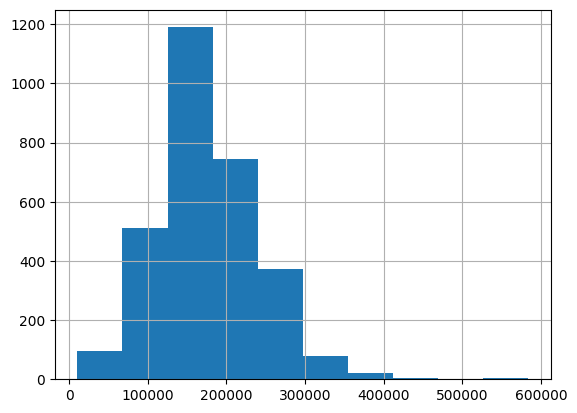

In [140]:
df['script_len'].hist() # histogram of script length (characters)

## Add Sentiment Analysis

In [141]:
def sentiment_output(text):
    """
    Funciton to clean text and retrieve sentiment polarity from TextBlob

    The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. 
    The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
    """
    text = text.replace('\n', ' ').replace('\t', ' ')
    text = re.sub('\s+', ' ', text.lower())
    text = text.lower()
    ## Tokenization
    tokens = word_tokenize(text)

    ## Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    ## Remove special characters (keeping only letters)
    tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens]

    ## Lemmatization (optional)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Re-join tokens into a single string
    cleaned_text = ' '.join(tokens)

    # Sentiment Analysis
    blob = TextBlob(cleaned_text)
    sentiment = blob.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity

    return polarity
    

In [142]:
df['polarity'] = df['Content'].apply(sentiment_output)

<Axes: >

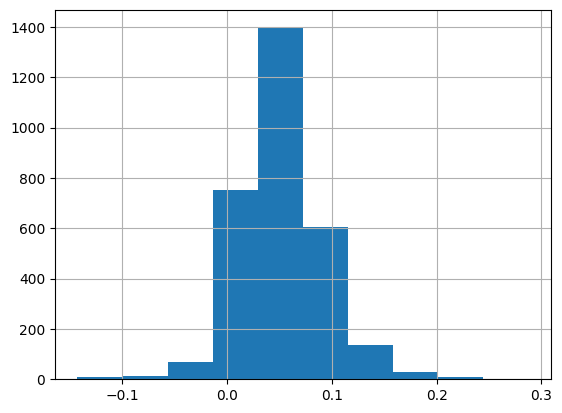

In [143]:
df['polarity'].hist()

## Import IMDB dataset

In [144]:
# Remove duplicates for movie title in script
script_duplicates_rem= df.drop_duplicates(subset='File Name', keep=False)

# Remove duplicates for movie title in IMDB dataset
duplicates_in_A = merged_df.duplicated(subset='primaryTitle', keep=False)
df_no_duplicates_in_A = merged_df.reset_index()[~duplicates_in_A]

# Merge 
new_merge = pd.merge(script_duplicates_rem, df_no_duplicates_in_A, left_on='File Name', right_on = 'primaryTitle', how='inner')
new_merge.shape

(460, 31)

In [145]:
new_merge.sort_values('index', ascending=True).head(20)

,File Name,Content,script_len,polarity,index,tconst,titleType,primaryTitle,originalTitle,isAdult,...,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
152,Inception,\n\n\n\n\n INCEPTION\n\...,222726,0.020659,2,tt1375666,movie,Inception,Inception,0,...,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0
61,Forrest Gump,"\n ""FORRE...",261446,0.084617,5,tt0109830,movie,Forrest Gump,Forrest Gump,0,...,0.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,2.0
158,Django Unchained,\n\n\n DJ...,320014,0.049246,16,tt1853728,movie,Django Unchained,Django Unchained,0,...,0.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,1.0
368,The Prestige,T\n\nH\n\nE\n\nP\n\nR\n\nE\n\nS\n\nT\n\nI\n\nG...,156270,0.067370,28,tt0482571,movie,The Prestige,The Prestige,0,...,0.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,3.0
216,The Godfather Part II,\nFADE IN:\n\nThe Paramount Pictures logo is p...,239133,0.072127,33,tt0071562,movie,The Godfather Part II,The Godfather Part II,0,...,0.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,2.0
438,Stranger Things,Episode #101\n\n10/19/15\nSTRANGER THINGS\n\...,69670,0.005708,34,tt4574334,tvSeries,Stranger Things,Stranger Things,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
100,Up,\n \n\n ...,186305,0.053777,55,tt1049413,movie,Up,Up,0,...,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0
195,Finding Nemo,----------------------------------------------...,77545,0.130061,57,tt0266543,movie,Finding Nemo,Finding Nemo,0,...,0.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0
165,Catch Me If You Can,\n\n\n \n CATCH...,238389,0.059826,59,tt0264464,movie,Catch Me If You Can,Catch Me If You Can,0,...,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,3.0
1,No Country for Old Men,\n\n\n \n NO COUNTRY ...,189510,0.013795,71,tt0477348,movie,No Country for Old Men,No Country for Old Men,0,...,0.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,0.0,3.0


<Axes: >

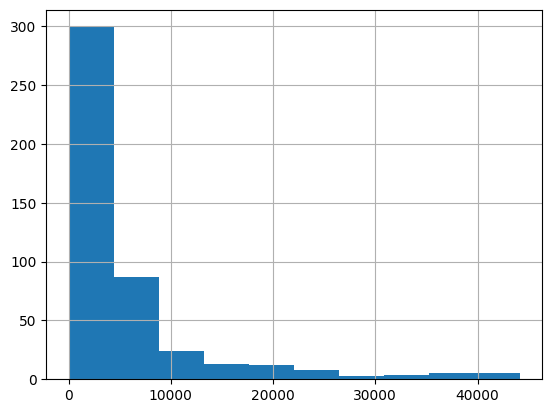

In [146]:
new_merge['index'].hist() # histogram of movies that are matched to the scripts (do we have scripts of popular movies?)

<Axes: >

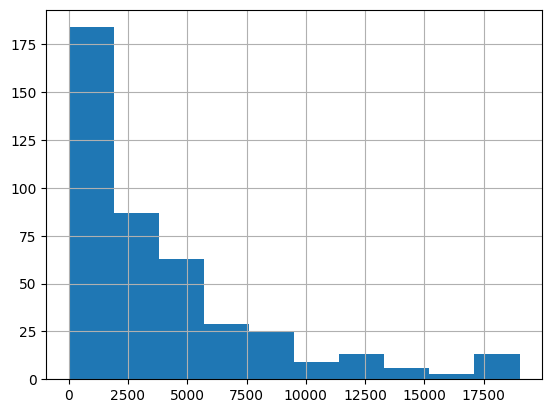

In [147]:
new_merge[new_merge['index']<20000]['index'].hist() # zoom in on the histogram

In [148]:
# save to csv
new_merge.to_csv('../data/clean_data/movie_level_data_with_sentiment.csv', index = False)

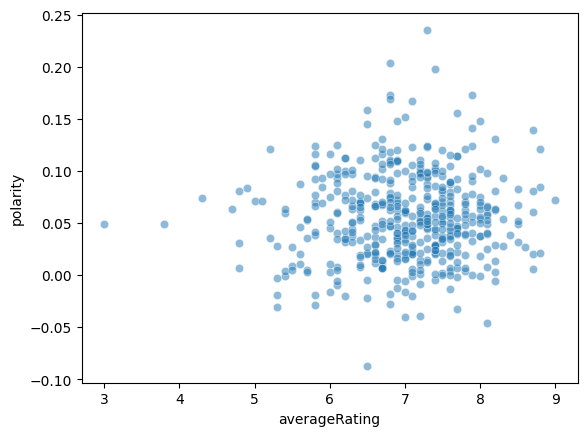

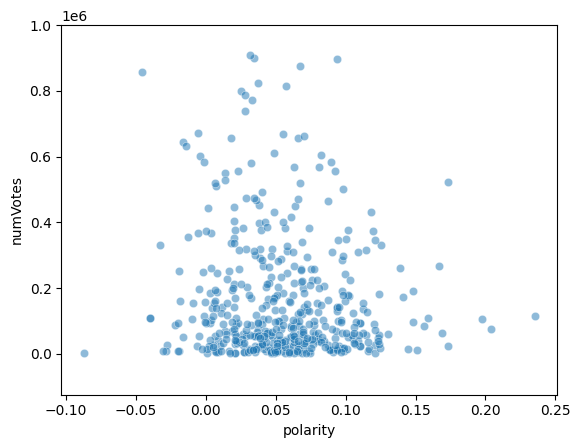

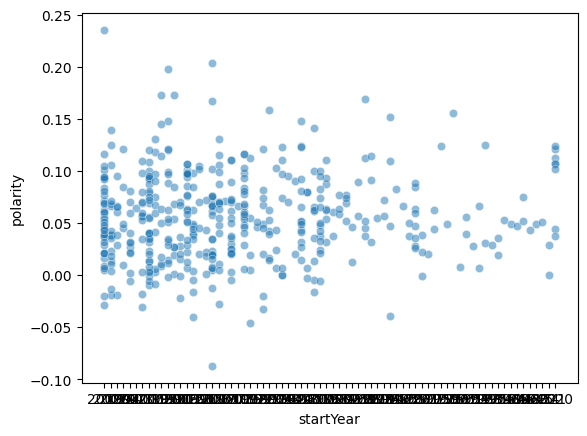

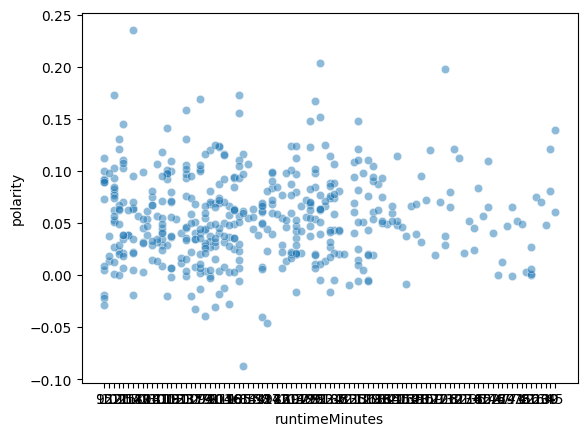

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='averageRating',y='polarity',data=new_merge, alpha = 0.5)
plt.show()
sns.scatterplot(x='polarity',y='numVotes',data=new_merge, alpha = 0.5)
plt.ylim(top=1000000)
plt.show()
sns.scatterplot(x='startYear',y='polarity',data=new_merge, alpha = 0.5)
plt.show()
sns.scatterplot(x='runtimeMinutes',y='polarity',data=new_merge, alpha = 0.5)
plt.show()

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose we want to loop through these names and create a list for each
genres = set(sum(new_merge['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary
lists_dict = {}

# Loop through the names and create an empty list for each, stored in the dictionary
for name in genres:
    lists_dict[name] = new_merge[new_merge['genres'].str.contains(name)]['polarity'].tolist()

# Initialize an empty DataFrame
df_long = pd.DataFrame(columns=['Category', 'Values'])

# Populate the DataFrame
for key, values in lists_dict.items():
    temp_df = pd.DataFrame({'Category': key, 'Values': values})
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

/var/folders/lb/dk54cbx965z7nj61zps2fzr00000gn/T/ipykernel_40881/1597108964.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_long = pd.concat([df_long, temp_df], ignore_index=True)


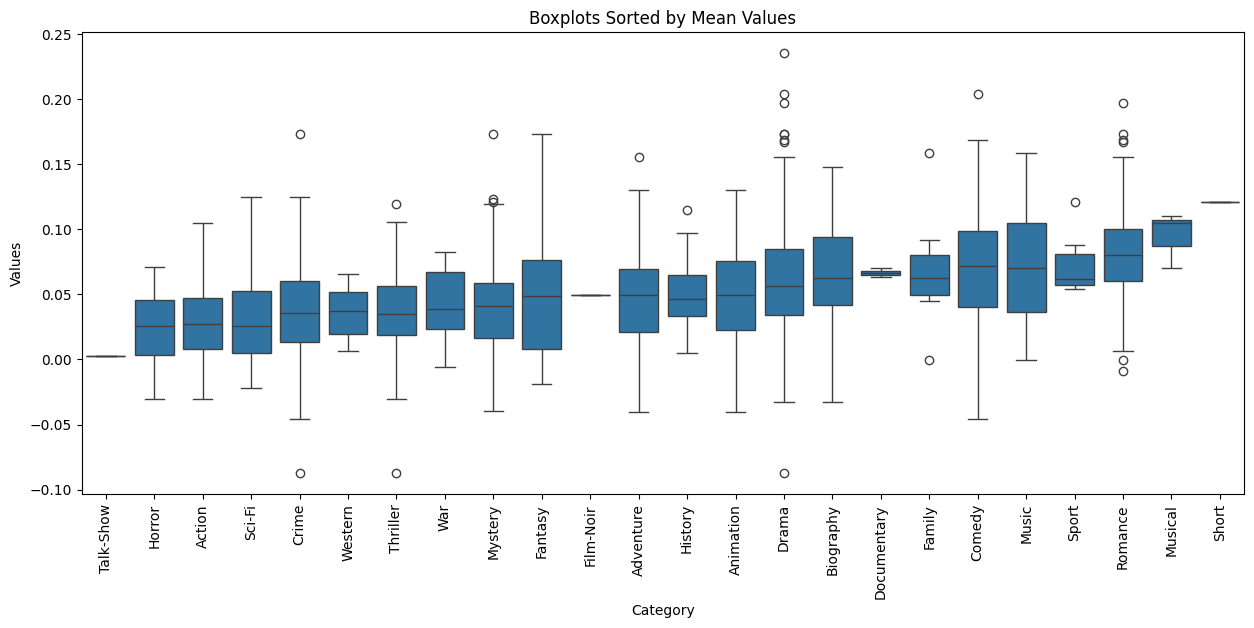

In [151]:
# Calculate mean values for each category
mean_values = df_long.groupby('Category')['Values'].mean().reset_index()

# Sort the categories based on their mean values
sorted_categories = mean_values.sort_values('Values')['Category']

# Plot the boxplot with seaborn, ordering the categories by their mean values
plt.figure(figsize=(15, 6))  # Set figure size
sns.boxplot(x='Category', y='Values', data=df_long, order=sorted_categories)
plt.xticks(rotation=90)
plt.title('Boxplots Sorted by Mean Values')
plt.show()

In [152]:
# save df_long to csv
df_long.to_csv('../data/clean_data/genre_sentiment.csv', index = False)

# Beautiful Soup for Box Office Performance

Adjusted for inflation in the last column

In [153]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

# inflation rates list, no rate for 2024 needed
inflation_rates = [
    6.50, 7.63, 11.25, 13.55, 10.33, 6.13, 3.21, 4.30, 3.55, 1.90, 
    3.66, 4.08, 4.83, 5.40, 4.24, 3.03, 2.95, 2.61, 2.81, 2.93, 
    2.34, 1.55, 2.19, 3.38, 2.83, 1.59, 2.27, 2.68, 3.39, 3.23, 
    2.85, 3.84, -0.36, 1.64, 3.16, 2.07, 1.46, 1.62, 0.12, 1.26, 
    2.13, 2.44, 1.81, 1.23, 4.70, 8.00, 3.4
]

def adjust_for_inflation(amount, year, current_year=2024):
    if year == current_year:
        # No adjustment needed for the current year
        return amount
    year_index = year - 1977  # Adjust index for 1977 base year
    if 0 <= year_index < len(inflation_rates):
        rate = inflation_rates[year_index] / 100
    else:
        rate = 0  # Default to no inflation adjustment if year is out of range
    # Adjust for each year up to the current year
    adjusted_amount = amount * ((1 + rate) ** (current_year - year))
    return round(adjusted_amount, 2)

def fetch_box_office_data(year):
    url = f'https://www.boxofficemojo.com/year/world/{year}/'
    response = requests.get(url)
    movies_data = []
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        rows = soup.find_all('tr')
        for row in rows:
            cells = row.find_all('td', class_='a-text-left mojo-field-type-release_group')
            if cells:
                movie_title = cells[0].text.strip()
                gross_str = row.find_all('td', class_='a-text-right mojo-field-type-money')[0].text.strip().replace('$', '').replace(',', '')
                try:
                    worldwide_gross = float(gross_str)
                except ValueError:
                    continue  # Skip rows where conversion fails
                adjusted_gross = adjust_for_inflation(worldwide_gross, year)
                movies_data.append((movie_title, year, worldwide_gross, adjusted_gross))
    else:
        print(f"Failed to fetch data for year {year}")
    return movies_data

all_movies_data = []

# Adjusted to include data up to and including 2024
for year in range(1977, 2025):
    yearly_data = fetch_box_office_data(year)
    all_movies_data.extend(yearly_data)

box_office_df = pd.DataFrame(all_movies_data, columns=['Title', 'Year', 'Worldwide_Box_Office', 'WBO_Adjusted_for_Inflation'])

print(box_office_df)

# save the data to a csv file
box_office_df.to_csv('../data/clean_data/box_office_data.csv', index=False)

                                   Title  Year  Worldwide_Box_Office  \
0     Star Wars: Episode IV - A New Hope  1977           307263857.0   
1                  Smokey and the Bandit  1977           126747995.0   
2     Close Encounters of the Third Kind  1977           116395460.0   
3                   Saturday Night Fever  1977            94213184.0   
4                       A Bridge Too Far  1977            50750000.0   
...                                  ...   ...                   ...   
8840                     Klaus & Barroso  2024              798670.0   
8841                       Buenas Chicas  2024              776556.0   
8842                            Hanu Man  2024              775578.0   
8843                           Jorgovani  2024              753674.0   
8844                        My Home Hero  2024              752621.0   

      WBO_Adjusted_for_Inflation  
0                   5.928476e+09  
1                   2.445528e+09  
2                   2.245782e+

# Selenium for Filming Locations

In [154]:
merged_df.shape

(44860, 26)

In [155]:
# get the tconst values from merged_df as a list
tconst_list = merged_df['tconst'].tolist()

# first few tconst values
tconst_list[:5]

# only keep the first 2500 tconst values
tconst_list = tconst_list[:2500]

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# def fetch_filming_locations_with_selenium(driver, tconst):
#     url = f'https://www.imdb.com/title/{tconst}/locations'
#     driver.get(url)
#     locations = ''

#     try:
#         # Attempt to click the "see more" button if it exists
#         see_more_buttons = driver.find_elements(By.CSS_SELECTOR, '.ipc-see-more__button')  # Ensure this is the correct class name
#         if see_more_buttons:
#             # Use JavaScript to execute the click directly
#             driver.execute_script("arguments[0].click();", see_more_buttons[0])
#             time.sleep(10)  # wait for additional content to load

#         # Retrieve filming locations
#         filming_locations_elements = driver.find_elements(By.CSS_SELECTOR, 'a.ipc-link--base')
#         locations = [element.text for element in filming_locations_elements if element.text]
#         locations = '; '.join(locations)
#     except Exception as e:
#         print(f"An error occurred while fetching data for tconst {tconst}: {e}")

#     return locations

def fetch_filming_locations_with_selenium(driver, tconst):
    url = f'https://www.imdb.com/title/{tconst}/locations'
    driver.get(url)
    locations = ''

    try:
        # Find all the "see more" buttons
        see_more_buttons = driver.find_elements(By.CSS_SELECTOR, '.ipc-see-more__text')
        
        # Decide which button to click, "All" is preferred if available
        button_to_click = None
        for btn in see_more_buttons:
            button_text = btn.text.strip()
            if "All" in button_text:
                button_to_click = btn
                break  # If "All" button is found, we will click it
            elif button_text.endswith('more'):
                button_to_click = btn  # If button ends with 'more', save it, but keep looking for "All"

        # If a button was found, click it
        if button_to_click:
            driver.execute_script("arguments[0].click();", button_to_click)
            time.sleep(10)  # wait for additional content to load
        
        # Retrieve filming locations
        filming_locations_elements = driver.find_elements(By.CSS_SELECTOR, 'a.ipc-link--base')
        locations = [element.text for element in filming_locations_elements if element.text]
        locations = '; '.join(locations)
    except Exception as e:
        print(f"An error occurred while fetching data for tconst {tconst}: {e}")

    return locations



def fetch_all_filming_locations(tconst_list):
    driver = webdriver.Chrome()
    all_locations = {}

    try:
        for tconst in tconst_list:
            locations = fetch_filming_locations_with_selenium(driver, tconst)
            # Process locations if needed
            locations = locations.split('; ')
            # Remove the first and last elements if they're not needed
            if locations and locations[0] == 'Create account':
                locations = locations[1:]
            if locations and 'Be the first to contribute' in locations[-1]:
                locations = locations[:-1]
            all_locations[tconst] = locations
    finally:
        driver.quit()
    
    return all_locations

# # Example usage
# tconst_list = ['tt0111161', 'tt0468569', 'tt1375666', 'tt0137523', 'tt0944947', 'tt0944947']
all_filming_locations = fetch_all_filming_locations(tconst_list)

i = 0

# for tconst, locations in all_filming_locations.items():
#     i += 1
#     if i % 50 == 0: # print every 50th tconst
#         print(f"{tconst}: {locations}")

In [ ]:
# dictionary with tconst as keys and list of locations as values
# Convert the dictionary into a list of lists, with each sublist containing a tconst and its locations
data_for_df = [[tconst] + locations for tconst, locations in all_filming_locations.items()]

# Determine the maximum number of locations for any movie to set the DataFrame's columns
max_locations = max(len(locations) for locations in all_filming_locations.values())

# Create column names based on the maximum number of locations
column_names = ['tconst'] + [f'location_{i}' for i in range(1, max_locations + 1)]

# Create the DataFrame
filming_locations_df = pd.DataFrame(data_for_df, columns=column_names)

# Fill NaN values with empty strings if any
filming_locations_df.fillna('', inplace=True)

# filming_locations_df.head()  # Show the first few rows of the DataFrame

In [ ]:
# save to csv
filming_locations_df.to_csv('../data/clean_data/filming_locations.csv', index = False)

# Converting Locations to Lat/Lon

In [20]:
# import relevant libraries
import numpy as np
import pandas as pd
import googlemaps
import sys
sys.path.insert(1, '../')
import secrets_wtm

# load in locaiton data
locations_df = pd.read_csv('../data/clean_data/filming_locations.csv')

# what does this data look like? 
locations_df.head()

,tconst,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,...,location_148,location_149,location_150,location_151,location_152,location_153,location_154,location_155,location_156,location_157
0,tt0111161,"Mansfield Reformatory - 100 Reformatory Road, ...","Butler, Ohio, USA","Sandy Point, St. Croix, U.S. Virgin Islands","Malabar Farm State Park - 4050 Bromfield Road,...","127A Smithfield Road, Frederiksted, Virgin Isl...","Wyandot County Courthouse, Upper Sandusky, Ohi...","Ashland, Ohio, USA","193 North Main Street, Mansfield, Ohio, USA","Snyder Road and Hagerman Road, Bellville, Ohio...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0468569,"Chicago, Illinois, USA","Battersea Power Station, Battersea, London, En...","Times Square, Causeway Bay, Hong Kong","Senate House, University College London, Malet...","Piccadilly Circus, Piccadilly, London, England...","Queen's Road Central, Central, Hong Kong, China","Millennium Station, Chicago, Illinois, USA",Twin Anchors Restaurant & Tavern - 1655 N. Sed...,"Hong Kong, China",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt1375666,"Fortress Mountain, Kananaskis Country, Alberta...","Tangier, Morocco","Shizuoka, Japan","Tokyo, Japan","Alberta, Canada","Da Stuzzi Delicatessen, 6 Rue César Franck, Pa...","Kananaskis Village, Kananaskis Country, Albert...","Pont de Bir-Hakeim, Paris, France","Bedford, Bedfordshire, England, UK",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0137523,"240 North Neptune Avenue, Los Angeles, Califor...","217 Figueroa Street, Los Angeles, California, USA",Promenade Towers Apartments - 123 South Figuer...,"325 West 8th Street - Los Angeles, California,...",St. Brendan's Catholic Church - 310 S. Van Nes...,"Stage 15, 20th Century Fox Studios - 10201 Pic...","Los Angeles Theatre - 615 S. Broadway, Downtow...","421 W. Eighth Street, Los Angeles, California,...","1331 B Street, Wilmington, Los Angeles, Califo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0944947,"Split, Split-Dalmatia County, Croatia","Vrsno, Sibenik, Croatia","Ouarzazate, Morocco","Dubrovnik, Croatia","Harland and Wolff Paint Hall, Titanic-Quarter,...","Castle Ward, Strangford, County Down, Northern...","Marrakech, Morocco","Magheramorne Quarry, Larne, County Antrim, Nor...",Iceland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Initialize the client with your API key
gmaps = googlemaps.Client(key=secrets_wtm.GOOGLE_MAPS_API_KEY)

In [8]:
# testing google maps api


def geocode_address(address):
    """Geocode a given address using Google Maps API."""
    # Attempt to geocode the address using Google Maps
    try:
        # The geocode method returns a list of results
        geocode_result = gmaps.geocode(address)
        if geocode_result:
            # Extract latitude and longitude
            latitude = geocode_result[0]['geometry']['location']['lat']
            longitude = geocode_result[0]['geometry']['location']['lng']
            return latitude, longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error when geocoding address {address}: {str(e)}")
        return None, None

# Example usage with a list of locations
locations = [
    "63 Rambling Drive, Scotch Plains, NJ, USA 07076",
    "Empire State Building",
    "Eiffel Tower",
    "UK",
    "Iceland",
    "Tokyo, Japan", 
    "USA",
    "California, USA",
    "Mansfield Reformatory - 100 Reformatory Road, Mansfield, Ohio, USA"

]

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Location', 'Latitude', 'Longitude'])

# Process each location
for location in locations:
    lat, lon = geocode_address(location)
    results_df = results_df.append({'Location': location, 'Latitude': lat, 'Longitude': lon}, ignore_index=True)

print(results_df)

In [ ]:
# Function to perform geocoding
def geocode_address(address):
    if pd.isna(address):
        return None, None
    try:
        # Geocode an address
        geocode_result = gmaps.geocode(address)
        if geocode_result:
            latitude = geocode_result[0]['geometry']['location']['lat']
            longitude = geocode_result[0]['geometry']['location']['lng']
            return latitude, longitude
    except Exception as e:
        print(f"Error geocoding {address}: {e}")
        return None, None

# Example usage with a DataFrame
locations_df = pd.read_csv('../data/clean_data/filming_locations.csv')

# Assuming you are processing 'location_1' as an example
locations_df[['location_1_lat', 'location_1_lon']] = locations_df['location_1'].apply(
    lambda loc: pd.Series(geocode_address(loc))
)

# Save the results
locations_df.to_csv('../data/clean_data/filming_locations_with_coordinates.csv', index=False)


# Additional Stuff (to do in future)

- might want to split based on genre or by titleType
- do something with episodes
- right no we have no location data or box office information (this was fixed)
- merge this with the text data -> sentiment analysis, (done) # curse words, what movies were mentioned in other movies (network graph), etc.
- are we ever doing something where we might interact with a single title on our dashboard? if so, might want to inquire about movie posters
- example usage of cast & crew information is above

# Notes

- merged_df is the main dataframe that we are working with (unit of observation = title)
- cast_and_crew is the dataframe that contains the number of people in the various positions (unit of observation = person)
- the titles are the same in both dataframes
- box_office_df is the dataframe that contains the box office information
- all_filming_locations is a dictionary of tconst with all filiming locations
- df_long contains the sentiment analysis for each genre
- new_merge contains movie-level sentiment analysis with all other information
- filming_locations_df contains all filming locations for the top 2500 titles based on number of ratings

# Video Games

In [157]:
# out of curiousity, what are the video games with the most ratings?
merged_df[merged_df['titleType'] == 'videoGame'].sort_values(by = 'numVotes', ascending = False).head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
3456,tt2140553,videoGame,The Last of Us,The Last of Us,0,2013,\N,\N,"Action,Adventure,Drama",9.7,...,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0
3621,tt2103188,videoGame,Grand Theft Auto V,Grand Theft Auto V,0,2013,\N,\N,"Action,Crime,Drama",9.5,...,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0
4558,tt6161168,videoGame,Red Dead Redemption II,Red Dead Redemption II,0,2018,\N,\N,"Action,Adventure,Crime",9.7,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0
5252,tt0383385,videoGame,Grand Theft Auto: San Andreas,Grand Theft Auto: San Andreas,0,2004,\N,\N,"Action,Crime",9.4,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0
5500,tt6298000,videoGame,The Last of Us: Part II,The Last of Us: Part II,0,2020,\N,\N,"Action,Adventure,Drama",8.8,...,0.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0
5932,tt0802999,videoGame,Grand Theft Auto IV,Grand Theft Auto IV,0,2008,\N,\N,"Action,Crime,Drama",8.9,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0
6021,tt5838588,videoGame,God of War,God of War,0,2018,\N,\N,"Action,Adventure,Drama",9.5,...,0.0,0.0,3.0,1.0,1.0,0.0,4.0,4.0,0.0,3.0
6197,tt3334704,videoGame,Uncharted 4: A Thief's End,Uncharted 4: A Thief's End,0,2016,\N,\N,"Action,Adventure,Drama",9.4,...,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,4.0
6334,tt1568322,videoGame,Batman: Arkham City,Batman: Arkham City,0,2011,\N,\N,"Action,Crime,Mystery",9.4,...,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,4.0
6501,tt1814884,videoGame,The Elder Scrolls V: Skyrim,The Elder Scrolls V: Skyrim,0,2011,\N,\N,"Action,Adventure,Fantasy",9.3,...,0.0,2.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,4.0
